In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

MNIST DATASET

In [2]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
len(y_train) , len(y_test)

(60000, 10000)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

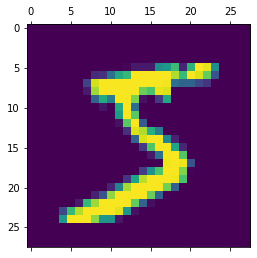

In [5]:
plt.matshow(x_train[0])

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 33s 76ms/step - loss: 0.3606 - accuracy: 0.8909 - val_loss: 0.0828 - val_accuracy: 0.9765
Epoch 2/15
422/422 [==============================] - 32s 77ms/step - loss: 0.1142 - accuracy: 0.9655 - val_loss: 0.0598 - val_accuracy: 0.9832
Epoch 3/15
422/422 [==============================] - 32s 75ms/step - loss: 0.0869 - accuracy: 0.9732 - val_loss: 0.0514 - val_accuracy: 0.9855
Epoch 4/15
422/422 [==============================] - 35s 83ms/step - loss: 0.0732 - accuracy: 0.9776 - val_loss: 0.0420 - val_accuracy: 0.9893
Epoch 5/15
422/422 [==============================] - 35s 82ms/step - loss: 0.0652 - accuracy: 0.9796 - val_loss: 0.0420 - val_accuracy: 0.9882
Epoch 6/15
422/422 [==============================] - 31s 74ms/step - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.0378 - val_accuracy: 0.9895
Epoch 7/15
422/422 [==============================] - 30s 70ms/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0364 - val_accuracy:

In [10]:
y_pred = model.predict(x_test)

In [11]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[32]

3

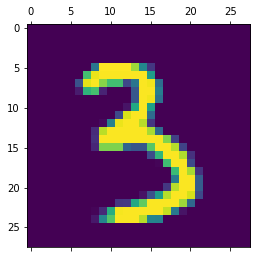

In [12]:
plt.matshow(x_test[32])